# 美国政治献金

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import DataFrame, Series

import warnings
warnings.filterwarnings("ignore")

# 导入数据

In [2]:
contd1 = pd.read_csv(r'C:\Users\Lin\Desktop\file\data\contb_01.csv')
contd2 = pd.read_csv(r'C:\Users\Lin\Desktop\file\data\contb_02.csv')
contd3 = pd.read_csv(r'C:\Users\Lin\Desktop\file\data\contb_03.csv')

In [3]:
contd1.shape

(500001, 7)

In [4]:
contd2.shape

(500001, 7)

In [5]:
contd3.shape

(1731, 7)

In [6]:
contd1.tail()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
499996,"Obama, Barack","KINDERGAN, NATASHA",NY,UNITED NATIONS,HUMANITARIAN AFFAIRS OFFICER,200.0,30-SEP-11
499997,"Obama, Barack","GLASSMAN, JOYCE",NY,GEA INC,EDUCATIONAL CONSULTANT,114.0,30-SEP-11
499998,"Obama, Barack","HOLZKA, DENISE",NY,HPMB,ATTORNEY,250.0,30-SEP-11
499999,"Obama, Barack","STRONG, EDWARD",NY,DODGER THEATRICALS LTD,THEATRICAL PRODUCER,500.0,21-SEP-11
500000,"Obama, Barack","THOMAS, MAMIE ETHEL",NY,RETIRED,RETIRED,200.0,30-SEP-11


# 数据合并

In [7]:
contb = pd.concat([contd1, contd2, contd3], axis=0)
contb.shape

(1001733, 7)

In [8]:
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      988004 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


数据说明

cand_nm 候选人

contbr_nm 

contbr_st 

contbr_employer

contbr_occupation 职业

contb_receipt_amt 

contb_receipt_dt 投票日期

# 数据清洗
有两列的数据有空值，过滤之后使用fillna()方法填充固定值

In [9]:
cond = contb['contbr_employer'].isnull()
contb[cond].head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
41,"Bachmann, Michelle","MINNIS, RITA",CA,NaN,NaN,-1500.0,20-JUN-11
264,"Bachmann, Michelle","BISHOP, GERARD",NY,NaN,NaN,-1700.0,28-JUN-11
752,"Romney, Mitt","KNIGHT, RENA",AL,NaN,NaN,-60.0,07-MAR-12
897,"Romney, Mitt",THE STEWART FIRM L.L.C.,AL,NaN,NaN,250.0,23-MAR-12
1033,"Romney, Mitt","SELLERS, LEE",AL,NaN,NaN,-120.0,20-JAN-12


In [10]:
contb['contbr_employer'].fillna('NOT PROVIDE', inplace=True)
contb['contbr_st'].fillna("NOT PROVIDE", inplace=True)
contb['contbr_occupation'].fillna("NOT PROVIDE", inplace=True)
contb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001733 non-null object
contbr_employer      1001733 non-null object
contbr_occupation    1001733 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


# 数据转换

In [11]:
contb.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [12]:
#字典映射进行转换：党派分析,建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [13]:
#使用map，传一个函数，建立一个映射
contb['party'] = contb['cand_nm'].map(parties)
contb.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [14]:
#根据政党，民众的选取支持数
contb['party'].value_counts()

Democrat      593747
Republican    407986
Name: party, dtype: int64

In [15]:
#根据政党来进行分组，分析每个政党的捐献总金额
#contb.groupby('party')['contb_receipt_amt'].sum()
contb.groupby('party')['contb_receipt_amt'].agg({'money':'sum'})

,money
party,
Democrat,1.335028e+08
Republican,1.652498e+08


# 数据筛选

In [16]:
#按照职业进行分组聚合，统计下每种职业捐献金额是多少,进行排序后取前10个
group_occupation = contb.groupby("contbr_occupation")['contb_receipt_amt'].agg({'total_money':'sum'}).sort_values(by='total_money', ascending=False)
#group_occupation = contb.groupby("contbr_occupation")['contb_receipt_amt'].sum().sort_values(ascending=False)[:10]
group_occupation[:10]

,total_money
contbr_occupation,
RETIRED,48176647.00
ATTORNEY,18470473.30
HOMEMAKER,17484807.65
INFORMATION REQUESTED PER BEST EFFORTS,15859514.55
INFORMATION REQUESTED,8742357.59
PHYSICIAN,7224044.40
PRESIDENT,6347843.59
EXECUTIVE,5273717.90
CONSULTANT,4932627.98


In [17]:
#按照公司统计，汇总
group_company = contb.groupby("contbr_employer")['contb_receipt_amt'].agg({'total_money':'sum'}).sort_values(by='total_money', ascending=False)
group_company[:10]

,total_money
contbr_employer,
RETIRED,41374333.67
SELF-EMPLOYED,28745318.28
INFORMATION REQUESTED PER BEST EFFORTS,16629440.70
HOMEMAKER,14738524.86
INFORMATION REQUESTED,8997347.66
NOT EMPLOYED,8636809.43
NOT PROVIDE,5655209.40
SELF,5243486.83
NONE,3809582.99


In [18]:
#过滤掉金额小于0的人数
contb_ = contb[contb['contb_receipt_amt']>0]
contb_.shape

(991477, 8)

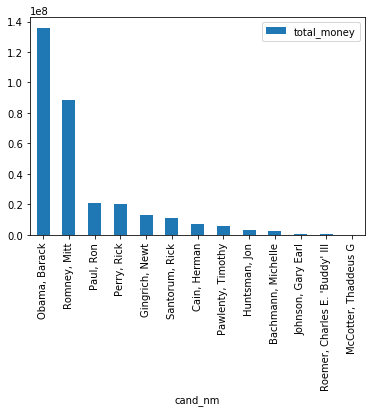

In [19]:
#查看各候选人获得的赞助总金额
cand_na_amt = contb_.groupby("cand_nm")['contb_receipt_amt'].agg({'total_money':'sum'}).sort_values(by='total_money', ascending=False)
cand_na_amt.plot(kind='bar')

In [20]:
cond1 = contb_['cand_nm'] == 'Obama, Barack'
cond2 = contb_['cand_nm'] == 'Romney, Mitt'
cond = cond1 | cond2
contb_vs = contb_[cond]

contb_.query("cand_nm == 'Obama, Barack' or cand_nm == 'Romney, Mitt'")

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican
416,"Romney, Mitt","WILSON, ANDREW C. MR.",AE,US DEPT OF STATE,FOREIGN SERVICE OFFICER,50.0,17-MAR-12,Republican
417,"Romney, Mitt","GRIFFIS, JOHN",AE,US ARMY,MILITARY OFFICER,250.0,20-MAR-12,Republican
418,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,09-APR-12,Republican
419,"Romney, Mitt","GRIFFIS, JOHN",AE,US ARMY,MILITARY OFFICER,250.0,28-JAN-12,Republican
420,"Romney, Mitt","DELUCA, PIERRE MR.",AE,US ARMY,ENGINEER,50.0,01-FEB-12,Republican


# 离散化和分箱处理

In [21]:
#将捐献金额放在不同的区间
bins = [0,1,10,100,1000,10000,100000,1000000]
labels = pd.cut(contb_vs['contb_receipt_amt'], bins)

contb_vs['labels'] = labels
contb_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party,labels
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican,"(10, 100]"
412,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican,"(100, 1000]"
413,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican,"(100, 1000]"
414,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican,"(10, 100]"
415,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican,"(10, 100]"


# 数据聚合与分组运算

In [22]:
#按照党派，职业对赞助金进行汇总
pivot_sum = contb_.pivot_table("contb_receipt_amt", index='contbr_occupation', columns='party', aggfunc='sum', fill_value=0)

#https://www.cnblogs.com/Yanjy-OnlyOne/p/11195621.html pivot_table用法讲解

#过滤掉赞助金额小于200W的数据
pivot_sum = pivot_sum[pivot_sum.sum(axis = 1) > 2000000]
pivot_sum

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INFORMATION REQUESTED,4866973.96,3.896616e+06
INFORMATION REQUESTED PER BEST EFFORTS,0.00,1.634053e+07


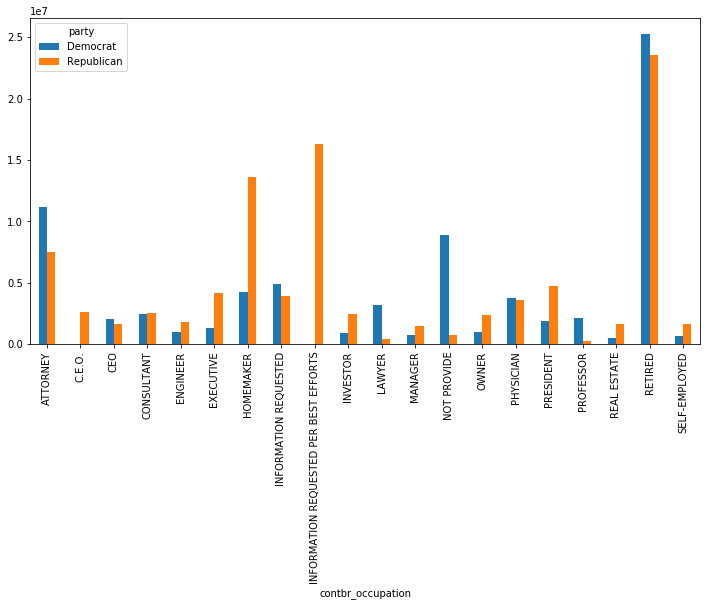

In [23]:
#可以使用多类型的柱状图，观察200W以上金额对两个党派的支持力度
plt.figure(figsize=(12,6))
ax = plt.subplot(1,1,1)
pivot_sum.plot(kind='bar',ax=ax)

In [24]:
#根据职业与雇主信息分组运算统计候选人被支持情况
#参数二是继续分组的key
#参数三是返回前多少个结果

#定义函数get_top_amounts()对两个字段进行分析处理
def get_top_amounts(grouped, key, n):
    return grouped.groupby(key)['contb_receipt_amt'].sum().sort_values(ascending=False)[:n]

In [32]:
#职业对各候选人献金影响
grouped = contb_vs.groupby("cand_nm")
grouped.apply(get_top_amounts, 'contbr_occupation', 8).unstack(level=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
ATTORNEY,11141982.97,5364718.82
C.E.O.,NaN,1968386.11
CONSULTANT,2459912.71,NaN
EXECUTIVE,NaN,2300947.03
HOMEMAKER,4248875.80,8147446.22
INFORMATION REQUESTED,4866973.96,NaN
INFORMATION REQUESTED PER BEST EFFORTS,NaN,11396894.84
INVESTOR,NaN,1537595.12
LAWYER,3160478.87,NaN


In [26]:
#统计各区间Obama, Barack	Romney, Mitt接收捐赠次数
amt_vs = contb_vs.groupby(['cand_nm','labels']).size().unstack(level= 0,fill_value = 0)
amt_vs

cand_nm,"Obama, Barack","Romney, Mitt"
labels,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153992,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0


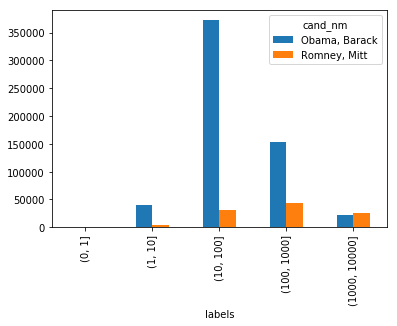

In [27]:
#个人捐款
amt_vs[:-2].plot(kind='bar')

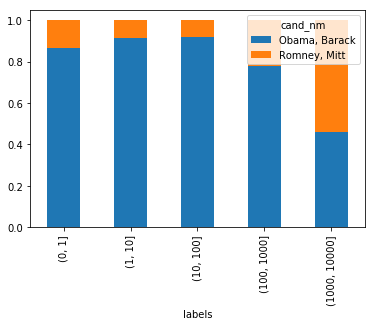

In [28]:
#算出每个区间两位候选人收到赞助总金额的占比
amt_vs_percent = amt_vs.div(amt_vs.sum(axis=1), axis=0)
#百分比堆积图
amt_vs_percent[:-2].plot(kind='bar', stacked=True)